# Metal bands by Nation


### About the Dataset
The source CSV consists details of metal bands since 1964 upto 2016. The columns in the dataset are :
- band name 
- how many fans the band has on the website 
- when the band formed 
- the country of origin on the band
- when the band split 
- the styles of the band

Source : https://www.kaggle.com/mrpantherson/metal-by-nation/

Acknowledgements :
The metal information was originally compiled from information found on http://metalstorm.net/

### Submited by Sharddha Dubey

### Submited to Dr.Baro Pajo 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
%matplotlib inline

### Read the CSV files and store into data frames.

In [2]:
bands=pd.read_csv("C:/Lectures/DataVisualization/Project2/metal-bands-by-nation/metal_bands_2017.csv",
                  low_memory=False,encoding='latin-1')

### Remove any NAN/NA values from the data frames

In [3]:
# remove any row which has NAN values and drop unnecessory column with drop function, axis=0 will drop rows.
bands=bands.dropna(axis=0,how='any')

## Graph 1
### Plot the bar graph with most number of bands formed (top 20)

In [4]:
#create a new data frame with band name and origin
g1=bands[['band_name','origin']]

# count the number of band names of country
g1=g1.groupby(['origin']).count()

g1=g1.rename(columns={'band_name':'Number_of_bands'})

g1=g1.sort_values('Number_of_bands')

# select top 20 countries with highest number of bands
g2=g1.tail(20)

In [5]:
plt.style.use('dark_background')

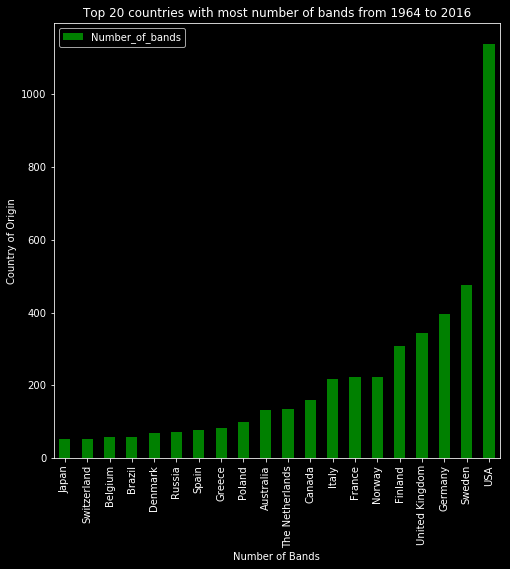

In [6]:
# top 20 countries in number of bands formed
g2.plot.bar(figsize=(8,8),color='green',)
plt.xlabel("Number of Bands")
plt.ylabel("Country of Origin")
plt.title("Top 20 countries with most number of bands from 1964 to 2016")

## Graph 2
### Plot the line graph showing highest number of split in bands.

In [7]:
# pick up the desired columns and create a new data frame
g3=bands[['band_name','split']]

# remove all the lines which are missing details of split
g3=g3[g3.split!='-']

# groip all the splits based of the year
g3=g3.groupby(by=['split'],axis=0).count()

#rename the column
g3=g3.rename(columns={'band_name':'number_of_bands'})

# select the columns with more than 100 splits 
g3=g3[g3['number_of_bands']>100]

In [8]:
x=g3.index.values
y=g3.number_of_bands.values

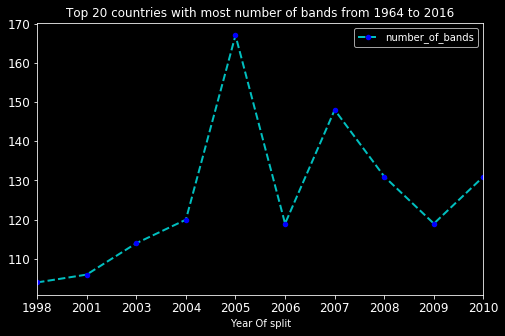

In [9]:
g3.plot(kind='line',linewidth=2.0,linestyle='--',color='c',marker='.',markeredgewidth='2.5',markeredgecolor='b',figsize=(8,5),
        fontsize=12,)
plt.xlabel("Year Of split")
plt.title("Top 20 countries with most number of bands from 1964 to 2016")
#plt.style.use('seaborn-ticks')

## Graph 3
### Scatter plot of number of band split vs formed

In [10]:
# pick up the desired columns and create a new data frame
g4=bands[['band_name','split','formed']]

# remove all the lines which are missing details of split
g4=g4[g4.split!='-']

g4=g4.sort_values(axis=0,ascending=True,by='formed')

#reset the index
g4.index=pd.RangeIndex(len(g4.index))

In [11]:
# count the number of bands formed and split.
split=g4.groupby(by=['split'],axis=0,as_index=False)['band_name'].count()
created=g4.groupby(by=['formed'],axis=0,as_index=False)['band_name'].count()

In [12]:
#for ease of understanding we can rename the columns
split=split.rename(columns={'split':'year','band_name':"number_of_bands_Split"})
created=created.rename(columns={'formed':'year','band_name':"number_of_bands_formed"})

In [13]:
# join two dataframes
g4=pd.merge(split,created,on=['year','year'])

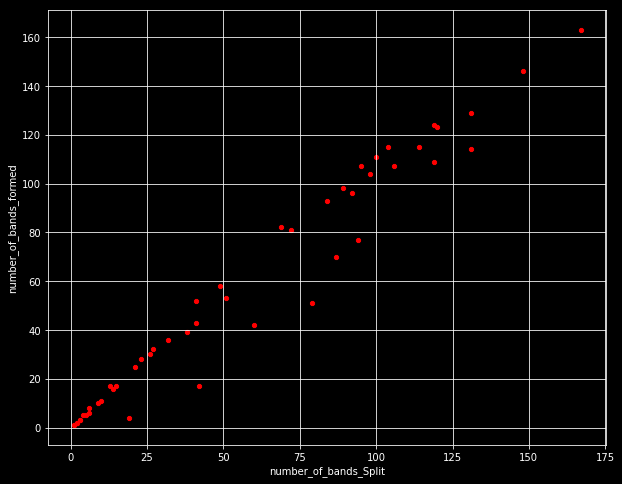

In [14]:
g4.plot.scatter('number_of_bands_Split','number_of_bands_formed',marker='8',c='r',figsize=(10,8),grid=True)

## Graph 4
### Categorical Plotting of number of bands formed and split

False


([<matplotlib.axis.YTick at 0x21f5aa646a0>,
 <a list of 50 Text yticklabel objects>)

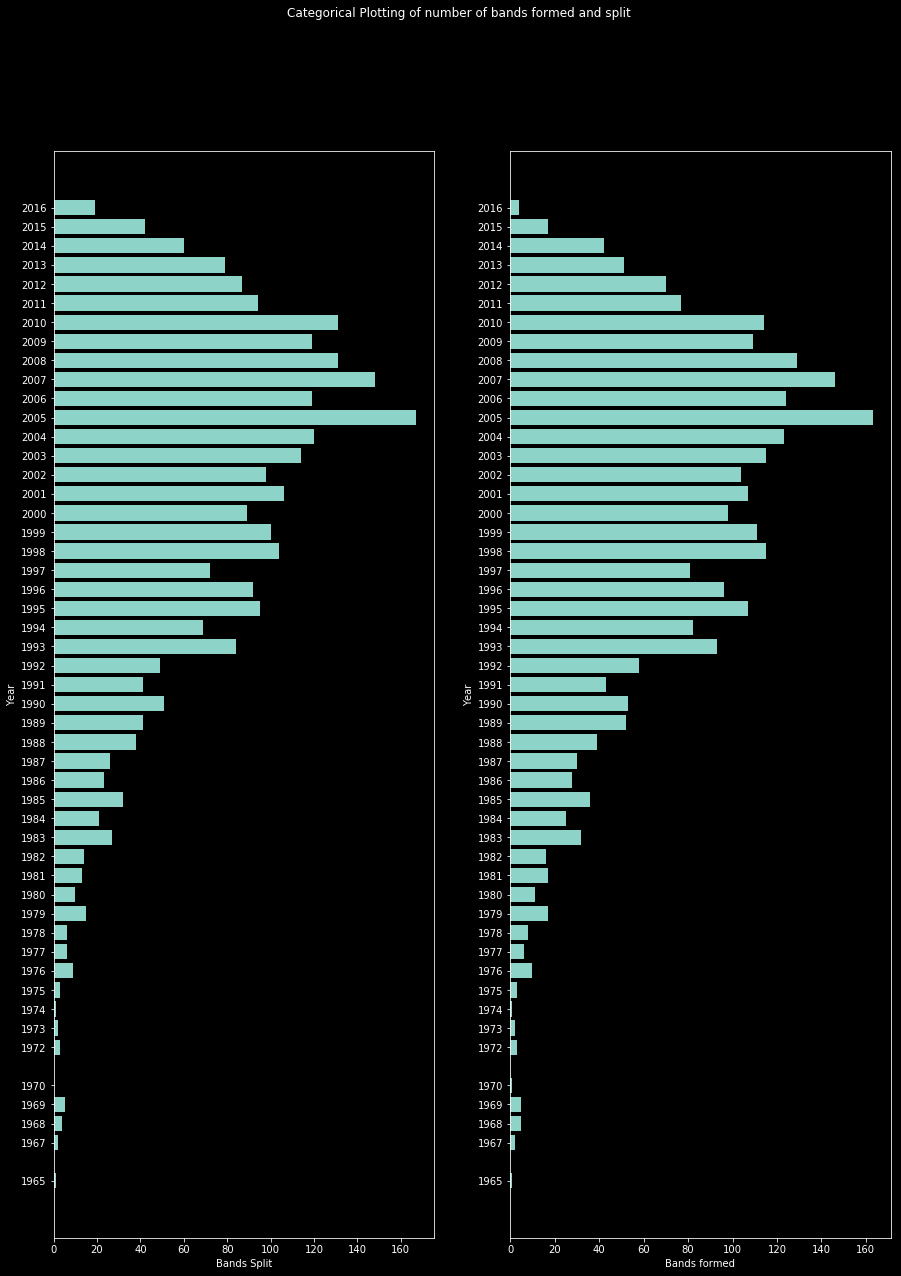

In [25]:
plt.figure(1,figsize=(15,20),edgecolor='m')
plt.subplot(121)
plt.barh(width=split['number_of_bands_Split'],bottom=split.year.astype(str).astype(int))
plt.ylabel("Year")
plt.xlabel("Bands Split")
plt.yticks(created.year.astype(str).astype(int))
plt.subplot(122)
plt.barh(width=created['number_of_bands_formed'],bottom=created.year.astype(str).astype(int))
plt.suptitle('Categorical Plotting of number of bands formed and split')
plt.ylabel("Year")
plt.xlabel("Bands formed")
plt.yticks(created.year.astype(str).astype(int))